# GoBike Project: Data Visualization

This project was created to analyze the [Ford GoBike Dataset](https://www.fordgobike.com/system-data&sa=D&ust=1554486256012000) from Bay Wheels to extract insights and behaviours about individual bike rides made in a bike-sharing system covering the greater San Francisco Bay area.

It is possible to verify the following sections in the project:

* I - Data Wrangling
* II - Visual Data Analysis
* III- Conclusions
* IV - References

By the end of Section I and after each plot, it is possible to observe questions answered to analyze the results obtained.

The visual analysis of the dataframe will focus in analyze and provide insights to 3 questions :

* What is the average duration of bike rides?
* Does people prefer to ride bikes in some specific months?
* Is there a difference in the duration of bike rides from subscribers or a customers?

## Data Wrangling

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import glob

%matplotlib inline

Through the initial data cleaning process, performed so the csv files could be merged, it was possible to analyze a different pattern of data stored from Abril 2020 to June 2020, when comparing with data from the previous months. Because these files present new columns and different syntax strucuture in some cases, these last 3 months were excluded from the analysis, resulting in an analysis of 9 months. 

In [2]:
! ls ./bike-data/

201907-baywheels-data.csv
201908-baywheels-data.csv
201909-baywheels-data.csv
201910-baywheels-data.csv
201911-baywheels-data.csv
201912-baywheels-data.csv
202001-baywheels-data.csv
202002-baywheels-data.csv
202003-baywheels-data.csv
Data Wrangling - Visualization Project.ipynb


In [3]:
# Adding csv files to a list
csv_files = ['/bike-data/201908-baywheels-data.csv',
             '/bike-data/201909-baywheels-data.csv',
             '/bike-data/201910-baywheels-data.csv',
             '/bike-data/201911-baywheels-data.csv',
             '/bike-data/201912-baywheels-data.csv',
             '/bike-data/202001-baywheels-data.csv',
             '/bike-data/202002-baywheels-data.csv',
             '/bike-data/202003-baywheels-data.csv']

In [4]:
# Creating a unique df with data from 8 csv files
df = pd.concat([pd.read_csv(f,) for f in glob.glob("bike-data" + "/*.csv")], ignore_index=True)

In [5]:
# Creating copy of dataframe to clean it (best practice)
df_bike = df.copy()

In [6]:
#df_bike.describe()
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2884162 entries, 0 to 2884161
Data columns (total 13 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         int64  
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           int64  
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
dtypes: float64(4), int64(4), object(5)
memory usage: 286.1+ MB


In [7]:
# Checking dataframe
df_bike.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,85457,2019-07-31 09:25:37.3410,2019-08-01 09:09:54.6000,36,Folsom St at 3rd St,37.783830,-122.398870,344,16th St Depot,37.766349,-122.396292,3491,Customer
1,53831,2019-07-31 18:00:10.2940,2019-08-01 08:57:21.9750,139,Garfield Square (25th St at Harrison St),37.751017,-122.411901,133,Valencia St at 22nd St,37.755213,-122.420975,2457,Customer
2,33674,2019-07-31 22:52:29.7910,2019-08-01 08:13:44.0100,155,Emeryville Public Market,37.840521,-122.293528,155,Emeryville Public Market,37.840521,-122.293528,2750,Customer


In [8]:
# Listing column's names
df_bike.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id',
       'user_type'],
      dtype='object')

After analyzing the dataframe, some columns will be excluded . The 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude' will be excluded with `del` function, as these information won't show relevant inofmartion in the analysis.

In [9]:
del df_bike['start_station_latitude']
del df_bike['start_station_longitude']
del df_bike['end_station_latitude']
del df_bike['end_station_longitude']
df_bike.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type
0,85457,2019-07-31 09:25:37.3410,2019-08-01 09:09:54.6000,36,Folsom St at 3rd St,344,16th St Depot,3491,Customer
1,53831,2019-07-31 18:00:10.2940,2019-08-01 08:57:21.9750,139,Garfield Square (25th St at Harrison St),133,Valencia St at 22nd St,2457,Customer
2,33674,2019-07-31 22:52:29.7910,2019-08-01 08:13:44.0100,155,Emeryville Public Market,155,Emeryville Public Market,2750,Customer


It is also possible to observe that time spent riding a bike is measured in seconds. This analysis will convert this unit to minutes, by dividing data from 'duration_sec' column by 60 and creating the 'duration_min' column.

In [10]:
# Creating 'duration_min' column
df_bike['duration_min'] = (df_bike['duration_sec']/60).astype('float64')
df_bike.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,duration_min
0,85457,2019-07-31 09:25:37.3410,2019-08-01 09:09:54.6000,36,Folsom St at 3rd St,344,16th St Depot,3491,Customer,1424.283333
1,53831,2019-07-31 18:00:10.2940,2019-08-01 08:57:21.9750,139,Garfield Square (25th St at Harrison St),133,Valencia St at 22nd St,2457,Customer,897.183333
2,33674,2019-07-31 22:52:29.7910,2019-08-01 08:13:44.0100,155,Emeryville Public Market,155,Emeryville Public Market,2750,Customer,561.233333


In [11]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2884162 entries, 0 to 2884161
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   duration_sec        int64  
 1   start_time          object 
 2   end_time            object 
 3   start_station_id    int64  
 4   start_station_name  object 
 5   end_station_id      int64  
 6   end_station_name    object 
 7   bike_id             int64  
 8   user_type           object 
 9   duration_min        float64
dtypes: float64(1), int64(4), object(5)
memory usage: 220.0+ MB


In [12]:
# Checking duplicated rows
sum(df_bike.duplicated())

724521

Most of the duplicated rows are related to NaN values. Duplicated rows will be excluded from the analysis.

In [13]:
# Dropping duplicate values
df_bike.drop_duplicates(inplace=True)
sum(df_bike.duplicated())

0

In [14]:
df_bike.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,duration_min
0,85457,2019-07-31 09:25:37.3410,2019-08-01 09:09:54.6000,36,Folsom St at 3rd St,344,16th St Depot,3491,Customer,1424.283333
1,53831,2019-07-31 18:00:10.2940,2019-08-01 08:57:21.9750,139,Garfield Square (25th St at Harrison St),133,Valencia St at 22nd St,2457,Customer,897.183333
2,33674,2019-07-31 22:52:29.7910,2019-08-01 08:13:44.0100,155,Emeryville Public Market,155,Emeryville Public Market,2750,Customer,561.233333


In [15]:
# Checking descriptive statistics
df_bike.describe()

,duration_sec,start_station_id,end_station_id,bike_id,duration_min
count,2.159641e+06,2.159641e+06,2.159641e+06,2.159641e+06,2.159641e+06
mean,8.177816e+02,1.182931e+02,1.135697e+02,1.724511e+05,1.362969e+01
std,1.894334e+03,1.350300e+02,1.327355e+02,2.718851e+05,3.157223e+01
min,6.000000e+01,0.000000e+00,0.000000e+00,4.000000e+00,1.000000e+00
25%,3.720000e+02,0.000000e+00,0.000000e+00,3.146000e+03,6.200000e+00
50%,5.920000e+02,6.700000e+01,6.100000e+01,1.109100e+04,9.866667e+00
75%,9.210000e+02,1.960000e+02,1.860000e+02,3.128330e+05,1.535000e+01
max,9.121100e+05,5.210000e+02,5.210000e+02,9.999600e+05,1.520183e+04


In [16]:
# Checking unique values from user_type column
df_bike['user_type'].unique()

array(['Customer', 'Subscriber'], dtype=object)

In [17]:
# Checking number of users that are Subscribers and Customers
df_bike['user_type'].value_counts()

Subscriber    1490110
Customer       669531
Name: user_type, dtype: int64

In [42]:
# Checking top 10 start station
df_bike['start_station_name'].value_counts()[:10]

San Francisco Caltrain (Townsend St at 4th St)        30813
Berry St at 4th St                                    28649
Market St at 10th St                                  28174
San Francisco Ferry Building (Harry Bridges Plaza)    22480
Howard St at Beale St                                 21252
Montgomery St BART Station (Market St at 2nd St)      21193
Powell St BART Station (Market St at 4th St)          20381
Powell St BART Station (Market St at 5th St)          18311
Steuart St at Market St                               16487
The Embarcadero at Sansome St                         15904
Name: start_station_name, dtype: int64

### What is the structure of your dataset?

> After some data wrangling process, there are more than 2 million observations in the dataset and 10 columns that will be used: duration_sec, start_time, end_time, start_station_id, start_station_name, end_station_id, end_station_name, bike_id and user_type. Some columns were excluded from the dataset: start_station_latitude, start_station_longitude, end_station_latitude and end_station_longitude.

### What is/are the main feature(s) of interest in your dataset?

> The main features that will be analyzed are duration of bike rides, date (months) of bike rides and type of user. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Dataset shows the datetime data in a single column, which makes it easy to split. There is already a duration in seconds column. User type is already divided in two groups: Subscribers and Customers

## Visual Data Analysis


The visual analysis of the dataframe will focus in analyze and provide insights to 3 questions :

* What is the average duration of bike rides?
* Does people prefer to ride bikes in some specific months?
* Is there a difference in the duration of bike rides from subscribers or a customers?

Some graphs were plotted below to answer these questions.

In [18]:
# Creating master file with clean data
df_bike.to_csv('master-bike.csv', sep=',', index=False)

### Univariate Exploration

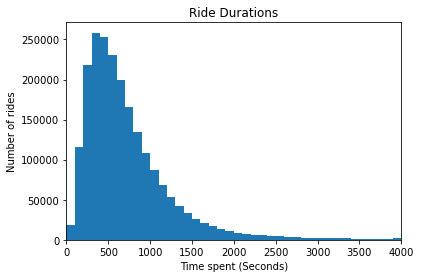

In [19]:
# Plotting distribution of trip durations in seconds

bin_edges = np.arange(0, df_bike['duration_sec'].max() + 100 , 100)
plt.hist(data = df_bike , x = 'duration_sec' , bins = bin_edges)
plt.xlim(0,4000)
plt.title('Ride Durations')
plt.xlabel('Time spent (Seconds)')
plt.ylabel('Number of rides');

It is possible to observe that most people rent a bike to ride up to 1000 seconds, approximately 16 minutes. The distribution of the bar chart is right skewed. This analysis in seconds doesn't seem usual, so it is also possible to analyze time spent in minutes, as it was already created a 'minutes' column.

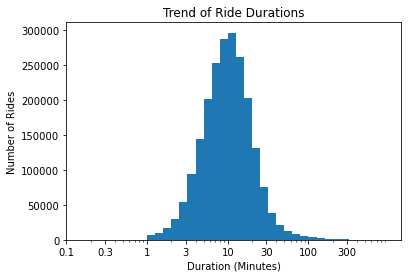

In [20]:
# Plotting ride duration count on log scale

bin_edges = 10**np.arange(0, 3+0.1, 0.1)
x_ticks =  [ 0.1, 0.3, 1, 3, 10, 30, 100, 300]
x_labels = ['{}'.format(v) for v in x_ticks]
plt.hist(data = df_bike, x = 'duration_min', bins = bin_edges);
plt.xscale('log');
plt.xticks(x_ticks,x_labels);
plt.title('Trend of Ride Durations')
plt.xlabel('Duration (Minutes)');
plt.ylabel('Number of Rides');

The log plot in minutes turns it easier to analyze that most bike rides take from 5 to 20 minutes.

#### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There were no unnusual points in the bar chart.

#### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The distribution of the bar chart is right skewed, so the x axis was transformed in a logarithmic scale. As an analysis in seconds doesn't seem usual, a minutes column was created to be more 'human friendly' and analyze number of rides.

### Bivariate Exploration

Another analysis that will be performed on this dataset is the variation of bike rides through the 8 months analyzed.

In [21]:
# Extracting Months from dataframe and creating a new column
df_bike['start_month'] = pd.DatetimeIndex(df_bike['start_time']).month
df_bike.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,duration_min,start_month
1640487,492,2019-12-20 16:59:27.3330,2019-12-20 17:07:40.2320,368,Myrtle St at Polk St,363,Salesforce Transit Center (Natoma St at 2nd St),11033,Subscriber,8.200000,12
2377270,546,2020-02-05 00:06:37.2300,2020-02-05 00:15:44.0370,106,Sanchez St at 17th St,59,S Van Ness Ave at Market St,2455,Customer,9.100000,2
2562918,373,2020-02-11 17:28:17,2020-02-11 17:34:30,0,NaN,0,NaN,394499,Subscriber,6.216667,2
413311,676,2019-08-09 09:59:02.0420,2019-08-09 10:10:18.4660,76,McCoppin St at Valencia St,21,Montgomery St BART Station (Market St at 2nd St),2454,Subscriber,11.266667,8
2307618,461,2020-02-22 23:22:36.7990,2020-02-22 23:30:17.8020,158,Shattuck Ave at Telegraph Ave,169,Bushrod Park,1242,Customer,7.683333,2


Text(0, 0.5, 'Ride duration (minutes)')

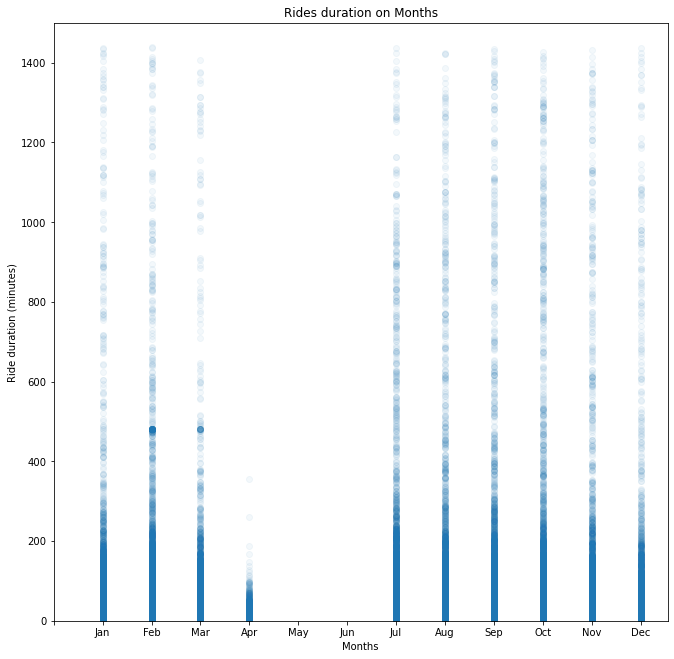

In [22]:
# Scatter plot with transparency to analyze bike rides in different months

plt.figure(figsize = [11,11])
x_ticks = np.arange(0, 13, 1)
x_ticks_names = ["", "Jan","Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", ""]
plt.scatter(data = df_bike, x = 'start_month' , y = 'duration_min' , alpha = 0.05 )
plt.ylim(0,1500)
plt.title('Rides duration on Months')
plt.xticks(x_ticks, x_ticks_names)
plt.xlabel('Months')
plt.ylabel('Ride duration (minutes)')

Analyzing the scatter plot, it can be seen a gap of data on April to June, which was expected because data from this period was excluded from the analysis. 

As data is from San Francisco (North Hemisphere), winter takes place in the months of November-January, resulting in bike rides with a shorter duration. The months from July to October shows more bike rides with 200 or more.

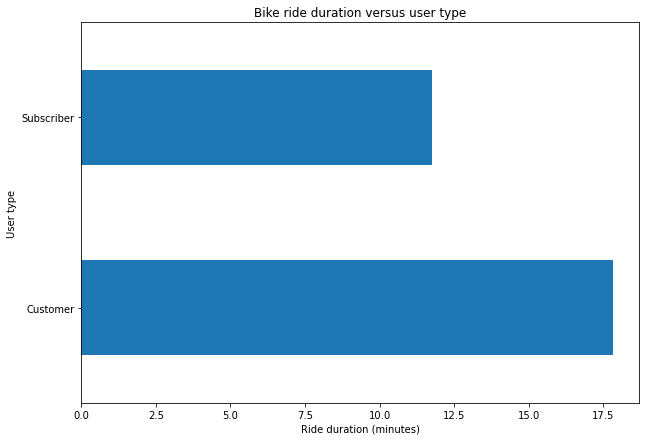

In [24]:
# Plotting horizontal bar chart to analyze duration of rides according to user type
ax = df_bike.groupby('user_type')['duration_min'].mean().plot(kind='barh', figsize=(10,7))
ax.set_title('Bike ride duration versus user type')
ax.set_ylabel('User type')
ax.set_xlabel('Ride duration (minutes)');

Analyzing the horizontal bar chart above, it can be seen that Customers spend on average 17.5 minutes in rides, while subscribers spend almost 12.5 minutes.

#### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> It was possible to observe that bike rides were also influenced by the month the bike was rented. In months with higher temperatures, peopel tend to ride bikes more often through this system.

#### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It could be seen that customers spend more time riding bikes, even with almost 800k less customers than subscribers. Probably customers are people that rent a bike to travel or recreation, explaining why they spend more time riding bikes.

### Multivariate Exploration

As a final analysis, number of bike rides versus months versus user type will be analyzed. To perform this task, the `FacetGrid` function from seaborn will be used. 

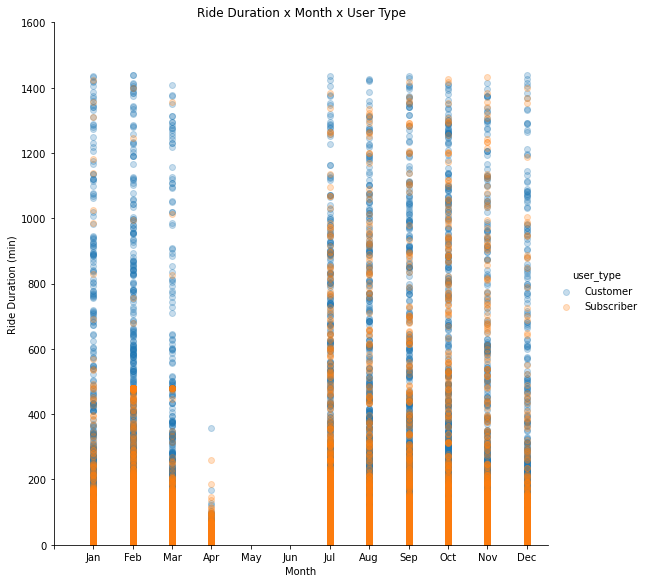

In [24]:
# Setting user type as the hue and plotting a scatter plot to analyze behaviour

x_ticks = np.arange(0, 13, 1)
x_ticks_names = ["", "Jan","Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", ""]
g = sb.FacetGrid(data =  df_bike, hue = 'user_type', height = 8)
g.map(plt.scatter, 'start_month','duration_min', alpha = 1/4)
g.add_legend()
plt.ylim(0,1600)
plt.xticks(x_ticks, x_ticks_names)
plt.title('Ride Duration x Month x User Type')
plt.xlabel('Month')
plt.ylabel('Ride Duration (min)');

From the plot above, it is possible to analyze that most subscribers prefer to take bike rides and spend up to 400 minutes. These rides last longer during the warmer months of the year.
Rides that last longer than 400 minutes usually are performed by Customers.

In [35]:
# Extracting day and hour with the same fuction used to extract month
df_bike['start_day'] = pd.DatetimeIndex(df_bike['start_time']).day
df_bike['start_hour'] = pd.DatetimeIndex(df_bike['start_time']).hour
df_bike.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,duration_min,start_month,start_day,start_hour
0,85457,2019-07-31 09:25:37.341,2019-08-01 09:09:54.6000,36,Folsom St at 3rd St,344,16th St Depot,3491,Customer,1424.283333,7,31,9
1,53831,2019-07-31 18:00:10.294,2019-08-01 08:57:21.9750,139,Garfield Square (25th St at Harrison St),133,Valencia St at 22nd St,2457,Customer,897.183333,7,31,18
2,33674,2019-07-31 22:52:29.791,2019-08-01 08:13:44.0100,155,Emeryville Public Market,155,Emeryville Public Market,2750,Customer,561.233333,7,31,22


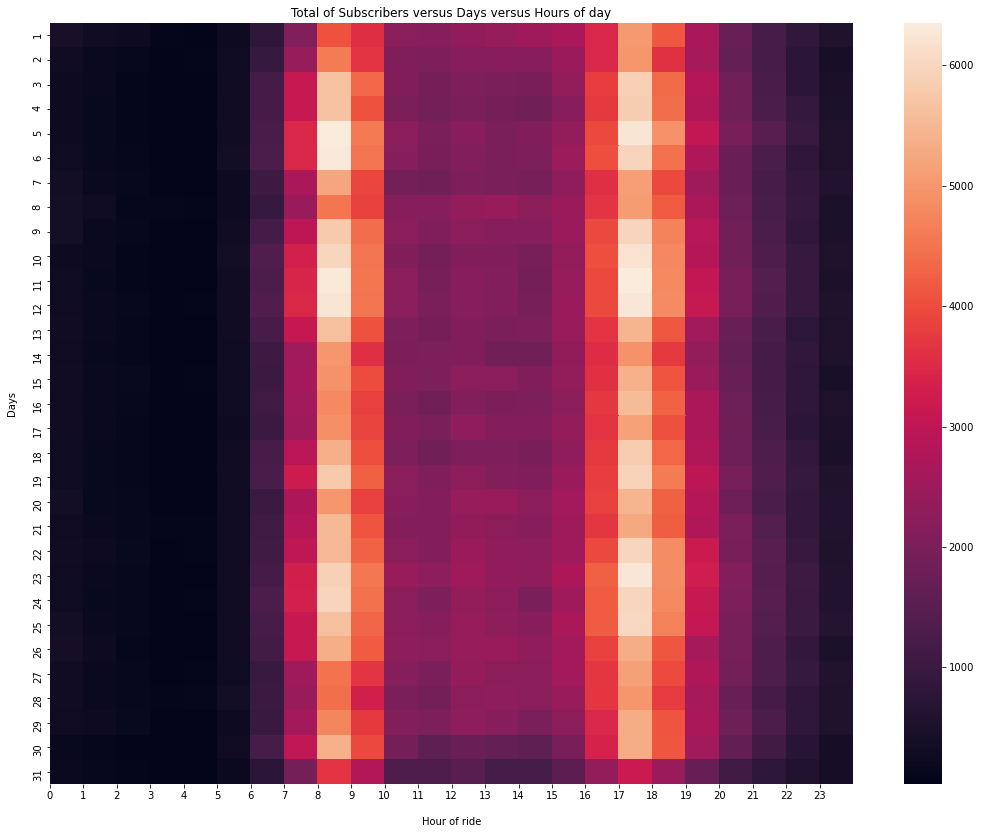

In [40]:
df_s = df_bike[df_bike['user_type'] == 'Subscriber'].groupby(['start_day','start_hour'], 
                                                           as_index=False).size().reset_index(name='')
#df_c = df_bike[df_bike['user_type'] == 'Customer'].groupby(['start_day','start_hour'], 
#                                                           as_index=False).size().reset_index(name='')

# Plotting heatmap of subscribers x hour of ride x day of ride

plt.figure(figsize = [18, 14])
x_ticks = np.arange(0, 24, 1)
x_ticks_names = ["0", "1","2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", 
                 "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", ""]
sb.heatmap(df_s.pivot('start_day','start_hour'))
plt.xticks(x_ticks, x_ticks_names)
plt.title('Total of Subscribers versus Days versus Hours of day')
plt.ylabel('Days\n')
plt.xlabel('\nHour of ride');

With this heatmap it is possible to verify that subscribers possibly use this rent system to daily tasks like going to work, supermarket or school, for example.

#### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Analyzing the time of when subscribers rent explains why there are more subscribers than costumers: people become mebers of this system to complete daily tasks, like going to work, supermarket or school, for example.

#### Were there any interesting or surprising interactions between features?

> It is also possible to analyze in this last heatmap that the average use of bikes is almost constant for 5 days in a row and there is a reduction in this behaviour for 2 days. This happens because people should rent a bike to go to work (5 business days in a week).

## Conclusions

The analysis through this project provided insights and answered the questions about the behaviour of people who ride bike using the GoBike system.

A log plot turned it easier to analyze the distribution from bike rides, which usually take from 5 to 20 minutes.

Bike rides had shorter duration during colder months of the year. Warmer months (July to October) showed more bike rides with 200 or more minutes.

The Multivariate Exploration shows valuable insights when it is needed to analyze a third variable. It was possible to verify that most subscribers prefer to take bike rides and spend up to 400 minutes. These rides last longer during the warmer months of the year. 

Rides that last longer than 400 minutes usually are performed by Customers.

## References

* [Glob function to merge csv files](https://docs.python.org/3/library/glob.html)
* [Extracting month from a column](https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column)
* [Error tokening - bad_lines](https://github.com/kaushaltrivedi/fast-bert/issues/96)
* [Rename Function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)